# Assignment-07

# Clustering

# No.2 K-means Clustering

# Question 1

Eastwest airlines passenger details.

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [30]:
air=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


Normalisisng The Data

In [31]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
air1 = pd.DataFrame(trans.fit_transform(air.iloc[:,1:]))
air1

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


C:\Users\karth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


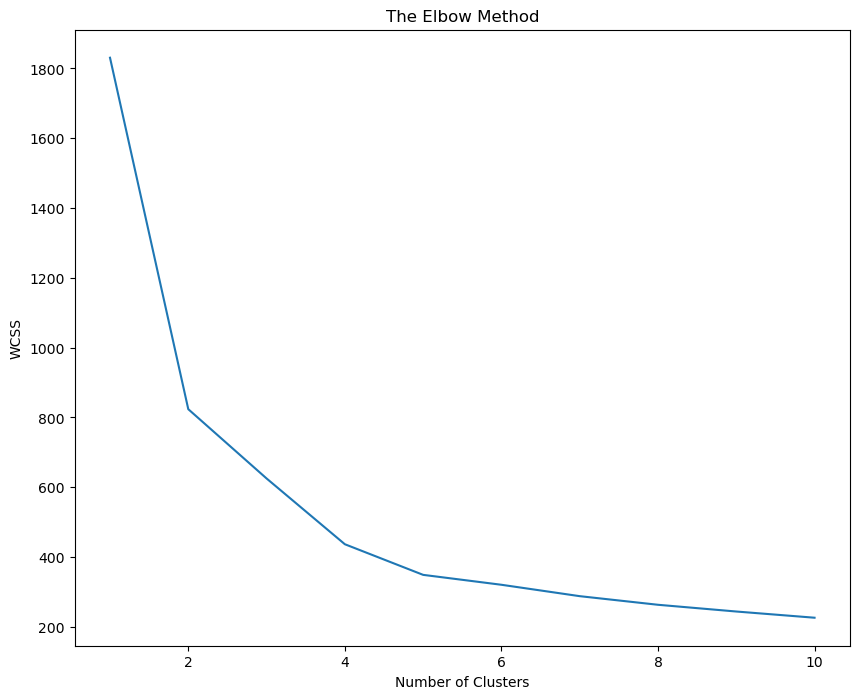

In [32]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(air1)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [33]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(air1)

In [34]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([2, 2, 2, ..., 3, 0, 0])

In [35]:
y_kmeans 

array([2, 2, 2, ..., 3, 0, 0])

In [36]:
clf.cluster_centers_ 

array([[ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -3.88578059e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01, -3.88578059e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
  

In [37]:
clf.inertia_

348.94332172541374

In [38]:
clf.inertia_

348.94332172541374

In [39]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
air['clust']=md # creating a  new column and assigning it to new column 
air 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [40]:
air.iloc[:,1:7].groupby(air.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245
2,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885
3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178
4,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204


By the above information we can understand that the passengers of Eastwest airlines who are belong to cluster 3 have an avg of 108317.38 miles eligible for award travel and eligible for award.

Like this we can analyse for all the clusters

Text(0.5, 1.0, 'Clusters using KMeans')

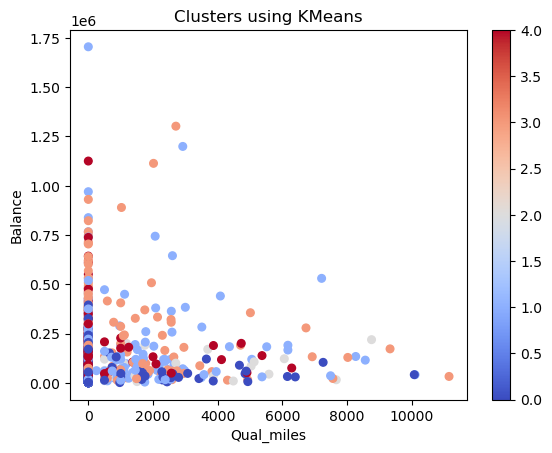

In [41]:
air.plot(x="Qual_miles",y ="Balance",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')  

Text(0.5, 1.0, 'Clusters using KMeans')

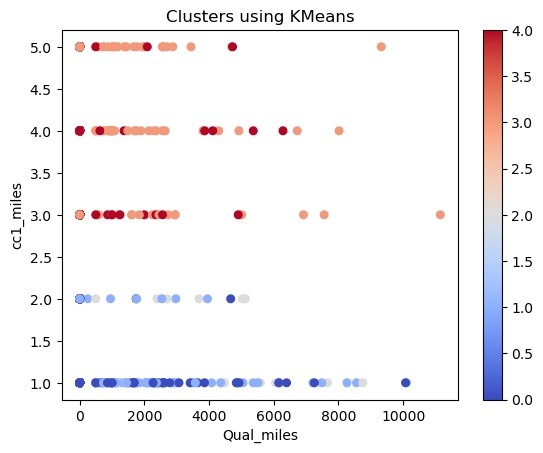

In [42]:
air.plot(x="Qual_miles",y ="cc1_miles",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

After clustering when we apply scatter plot to our data cc1 miles vs qual miles our plot looks like this .we can see many observations are overlapping.so we can increase our cluster number and experiment further to reduce our intertia(within cluster distance ).

In [43]:
WCSS

[1830.7932128584118,
 823.6756984125207,
 625.168488157072,
 436.7088576193261,
 348.9434283901319,
 320.54845351777914,
 287.9003173674291,
 263.2132188914898,
 243.91556603668764,
 226.12247587767507]

these are within cluster distances with respect to the observations and their belonging clusters.

In [44]:
clf = KMeans(n_clusters=6)
y_kmeans1 = clf.fit_predict(air1)

increased no of clusters 5 to 6

In [45]:
y_kmeans1
#clf.cluster_centers_
clf.labels_

array([1, 1, 1, ..., 3, 4, 4])

In [46]:
y_kmeans1

array([1, 1, 1, ..., 3, 4, 4])

In [47]:
clf.cluster_centers_

array([[ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -1.66533454e-16],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01, -3.88578059e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 4.11682179e-02,  1.45995017e-02,  6.20046620e-01,
         8.67361738e-19,  5.82750583e-04,  1.16176472e-01,
         2.14587738e-01,  1.70850663e-02,  3.02590491e-02,
         4.42052642e-01,  1.00000000e+00],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
  

In [48]:
clf.inertia_

315.15106431174485

You can see. our inertia value is decreased 348 to 315 when we did 6 clusters. now we can expect better results.

In [49]:
md1=pd.Series(y_kmeans1)  # converting numpy array into pandas series object 
air['clust']=md1 # creating a  new column and assigning it to new column 
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [50]:
air.iloc[:,1:7].groupby(air.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204
1,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885
2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245
3,70138.179070,162.376744,3.481395,1.000000,1.002326,30665.416279
4,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
5,151748.761905,239.243386,4.410053,1.002646,1.052910,62609.719577


By the above information we can understand that the passengers of Eastwest airlines who are belong to cluster 4 have an avg of 33097.301 miles eligible for award travel and eligible for award.

Like this we can analyse for all the clusters.

Text(0.5, 1.0, 'Clusters using KMeans')

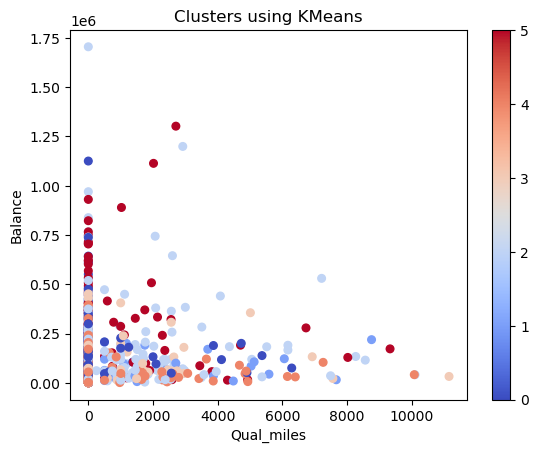

In [51]:
air.plot(x="Qual_miles",y ="Balance",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

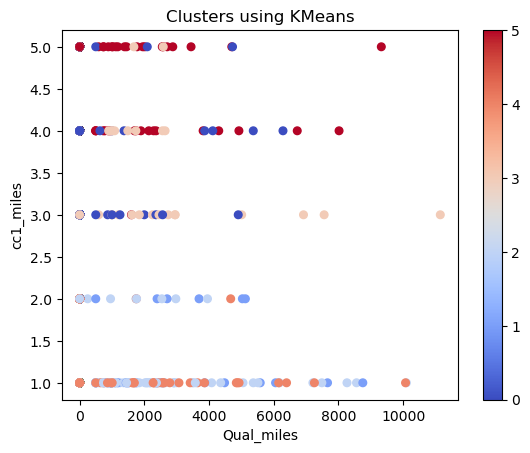

In [52]:
air.plot(x="Qual_miles",y ="cc1_miles",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

our model is improved compared to previous model.

We can improve our K means clustering model by changing K values and those K values can be taken using that elbow curve.by the elbow curve our k value is 5.we can experiment by taking 4,5,6 as k values.

Ultimately our aim is to reduce our within sum of square distances between our observations and cluster centre that is nothing but intertia.

# Question 2

Crime data

In [53]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Normalising The Data

In [54]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
crime1 = pd.DataFrame(trans.fit_transform(crime.iloc[:,1:]))
crime1 

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


C:\Users\karth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


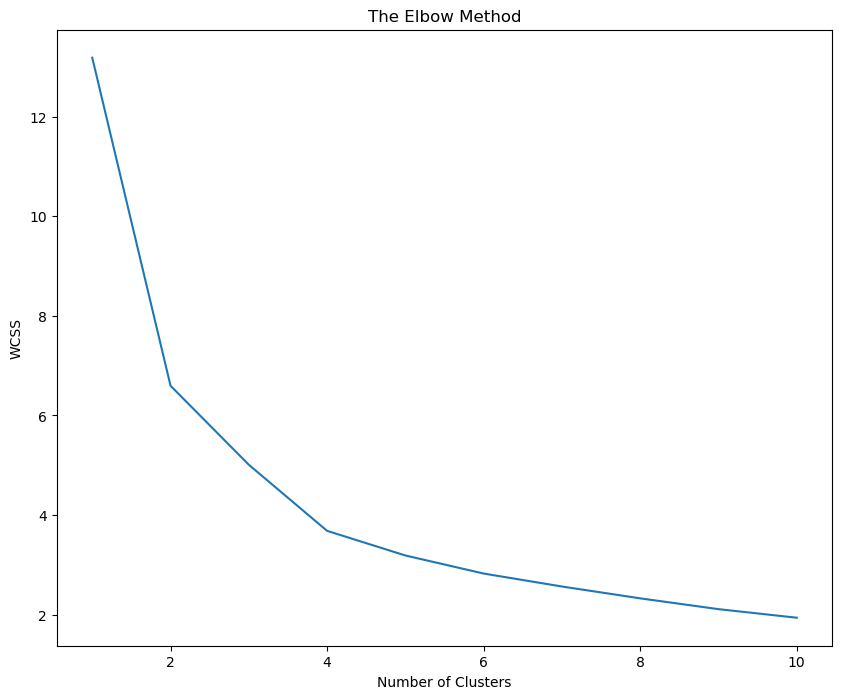

In [55]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(crime1)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [56]:
clf = KMeans(n_clusters=7)
y_kmeans = clf.fit_predict(crime1)

In [57]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([1, 5, 4, 3, 4, 4, 0, 3, 4, 1, 0, 6, 4, 3, 6, 3, 2, 1, 6, 4, 0, 4,
       6, 1, 3, 2, 6, 4, 6, 0, 4, 4, 1, 6, 3, 3, 3, 0, 0, 1, 2, 1, 4, 0,
       2, 3, 3, 2, 6, 3])

In [58]:
y_kmeans

array([1, 5, 4, 3, 4, 4, 0, 3, 4, 1, 0, 6, 4, 3, 6, 3, 2, 1, 6, 4, 0, 4,
       6, 1, 3, 2, 6, 4, 6, 0, 4, 4, 1, 6, 3, 3, 3, 0, 0, 1, 2, 1, 4, 0,
       2, 3, 3, 2, 6, 3])

In [59]:
clf.cluster_centers_

array([[0.2383821 , 0.268591  , 0.84503632, 0.2266519 ],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.28192771, 0.14246575, 0.20677966, 0.15245478],
       [0.36254107, 0.38325031, 0.58089368, 0.36504581],
       [0.6177437 , 0.75031133, 0.798151  , 0.65421658],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.09789157, 0.09760274, 0.42372881, 0.10949612]])

In [60]:
clf.inertia_

2.6277827301455945

In [61]:
cd=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime['clust']=cd # creating a  new column and assigning it to new column 
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,5
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,4
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,4
9,Georgia,17.4,211,60,25.8,1


In [62]:
crime.iloc[:,1:6].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.757143,123.428571,81.857143,16.071429,0.0
1,14.671429,251.285714,54.285714,21.685714,1.0
2,5.480000,86.600000,44.200000,13.200000,2.0
3,6.818182,156.909091,66.272727,21.427273,3.0
4,11.054545,264.090909,79.090909,32.618182,4.0
5,10.000000,263.000000,48.000000,44.500000,5.0
6,2.425000,73.500000,57.000000,11.537500,6.0


By the above information, we can say the places belongs to cluster 4 have the murder rate of 11.05 and assault rate of 264.09 on an average.

like this we can analyse all the clusters

In [63]:
data = crime[(crime.clust==0)]
data   

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
6,Connecticut,3.3,110,77,11.1,0
10,Hawaii,5.3,46,83,20.2,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
37,Pennsylvania,6.3,106,72,14.9,0
38,Rhode Island,3.4,174,87,8.3,0
43,Utah,3.2,120,80,22.9,0


These are the places which are belong to cluster 0

Text(0.5, 1.0, 'Clusters using KMeans')

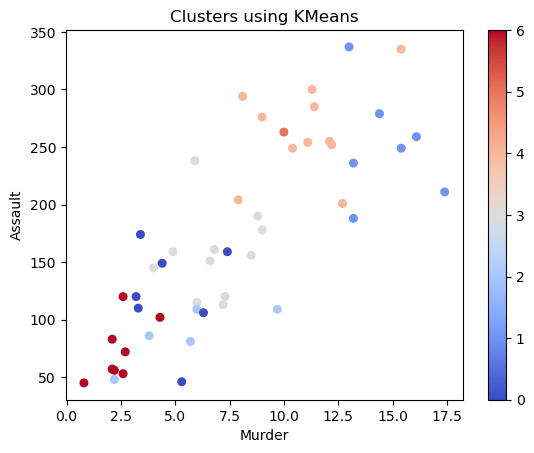

In [64]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

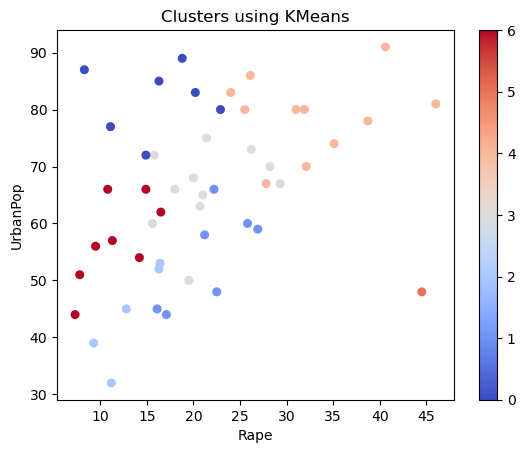

In [67]:
crime.plot(x="Rape",y ="UrbanPop",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Eventhough we did 7 clusters our observations are little bit overlapping so lets try with 8 clusters.

In [69]:
clf1 = KMeans(n_clusters=8)
y_kmeans1 = clf1.fit_predict(crime1)

In [70]:
y_kmeans1
#clf.cluster_centers_
clf1.labels_

array([5, 7, 2, 1, 2, 2, 0, 3, 2, 5, 0, 4, 2, 1, 4, 1, 1, 5, 4, 2, 0, 2,
       4, 6, 3, 1, 1, 2, 4, 0, 2, 2, 6, 4, 3, 3, 3, 0, 0, 6, 4, 5, 2, 0,
       4, 1, 3, 4, 4, 1])

In [71]:
y_kmeans1

array([5, 7, 2, 1, 2, 2, 0, 3, 2, 5, 0, 4, 2, 1, 4, 1, 1, 5, 4, 2, 0, 2,
       4, 6, 3, 1, 1, 2, 4, 0, 2, 2, 6, 4, 3, 3, 3, 0, 0, 6, 4, 5, 2, 0,
       4, 1, 3, 4, 4, 1])

In [72]:
clf1.cluster_centers_

array([[0.2383821 , 0.268591  , 0.84503632, 0.2266519 ],
       [0.38328313, 0.29751712, 0.45550847, 0.27648579],
       [0.6177437 , 0.75031133, 0.798151  , 0.65421658],
       [0.33032129, 0.41152968, 0.65819209, 0.41817399],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.84337349, 0.60273973, 0.48728814, 0.43217054],
       [0.8253012 , 0.84474886, 0.23163842, 0.29112834],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031]])

In [73]:
clf1.inertia_

2.3334805557287766

You can see. our inertia value is decreased 2.62 to 2.33 when we did 8 clusters. now we can expect better results.

In [74]:
cd1=pd.Series(y_kmeans1)  # converting numpy array into pandas series object 
crime['clust']=cd1 # creating a  new column and assigning it to new column 
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,5
1,Alaska,10.0,263,48,44.5,7
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,5


In [75]:
crime.iloc[:,1:6].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.757143,123.428571,81.857143,16.071429,0.0
1,7.162500,131.875000,58.875000,18.000000,1.0
2,11.054545,264.090909,79.090909,32.618182,2.0
3,6.283333,165.166667,70.833333,23.483333,3.0
4,2.680000,70.100000,51.000000,10.910000,4.0
5,14.800000,221.000000,60.750000,24.025000,5.0
6,14.500000,291.666667,45.666667,18.566667,6.0
7,10.000000,263.000000,48.000000,44.500000,7.0


By the above information, we can say the places belongs to cluster 0 have the murder rate of 4.75 and assault rate of 123.42 on an average.

like this we can analyse all the clusters

In [76]:
data1 = crime[(crime.clust==0)]
data1  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
6,Connecticut,3.3,110,77,11.1,0
10,Hawaii,5.3,46,83,20.2,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
37,Pennsylvania,6.3,106,72,14.9,0
38,Rhode Island,3.4,174,87,8.3,0
43,Utah,3.2,120,80,22.9,0


These are the places which are belong to cluster 0

Text(0.5, 1.0, 'Clusters using KMeans')

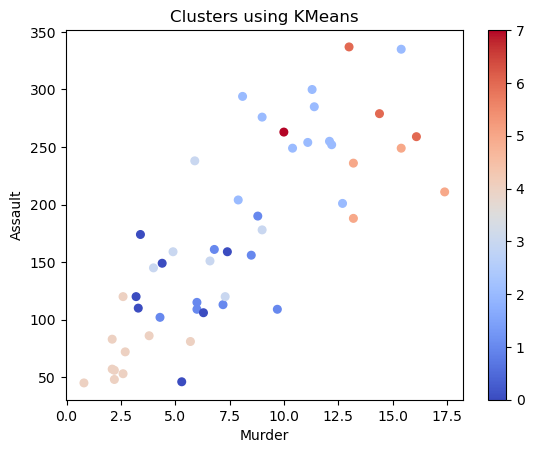

In [77]:
crime.plot(x="Murder",y ="Assault",c=clf1.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

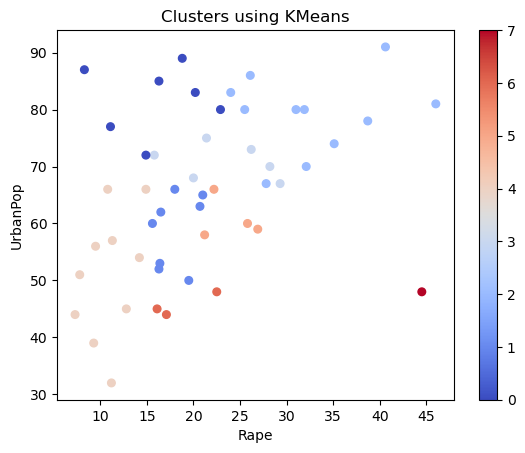

In [78]:
crime.plot(x="Rape",y ="UrbanPop",c=clf1.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

when we did 8 clusters our model is improved and our within sum of square distance between observations and cluster center has also reduced.

and we can say this our best model.